In [14]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Unemployment in India.csv")

# Show first 5 rows and column names
print(df.head())
print("\nColumns:", df.columns.tolist())



           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Columns: ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', '

In [15]:
df.columns = df.columns.str.strip().str.lower()

# Check cleaned column names
print(df.columns.tolist())

['region', 'date', 'frequency', 'estimated unemployment rate (%)', 'estimated employed', 'estimated labour participation rate (%)', 'area']


In [16]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Drop rows with missing dates or unemployment rate
df = df.dropna(subset=['date'])

# Check for missing values in all columns
print(df.isnull().sum())

region                                     0
date                                       0
frequency                                  0
estimated unemployment rate (%)            0
estimated employed                         0
estimated labour participation rate (%)    0
area                                       0
dtype: int64


In [17]:
# Find unemployment rate column
rate_cols = [col for col in df.columns if 'rate' in col]
print("Possible rate columns:", rate_cols)

# Check averages
print(df[rate_cols].mean())


Possible rate columns: ['estimated unemployment rate (%)', 'estimated labour participation rate (%)']
estimated unemployment rate (%)            11.787946
estimated labour participation rate (%)    42.630122
dtype: float64


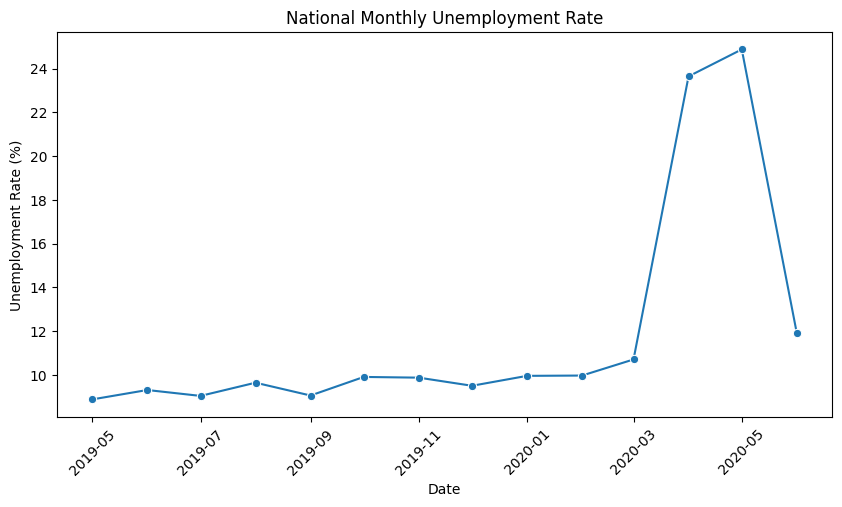

In [18]:
# Pick unemployment rate column (adjust name as printed above)
rate_col = 'estimated unemployment rate (%)'

# Group by month and take mean unemployment rate
monthly = df.groupby(df['date'].dt.to_period('M'))[rate_col].mean().reset_index()
monthly['date'] = monthly['date'].dt.to_timestamp()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x='date', y=rate_col, data=monthly, marker='o')
plt.title("National Monthly Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()


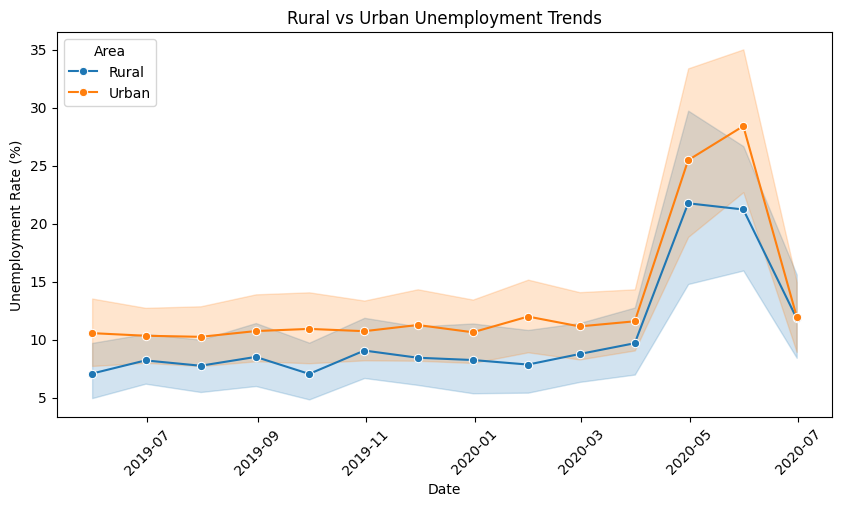

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x='date', y=rate_col, hue='area', data=df, marker='o')
plt.title("Rural vs Urban Unemployment Trends")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(title="Area")
plt.show()


In [20]:
# Define COVID start = March 2020
covid_start = pd.to_datetime("2020-03-01")

pre_covid = df[df['date'] < covid_start][rate_col].mean()
during_covid = df[df['date'] >= covid_start][rate_col].mean()

print("Average Unemployment Pre-COVID:", round(pre_covid, 2))
print("Average Unemployment During COVID:", round(during_covid, 2))


Average Unemployment Pre-COVID: 9.51
Average Unemployment During COVID: 17.77


In [21]:
# Calculate average unemployment rate per region
region_avg = df.groupby('region')[rate_col].mean().sort_values(ascending=False).head(10)

print("Top 10 regions by average unemployment rate:\n", region_avg)


Top 10 regions by average unemployment rate:
 region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Name: estimated unemployment rate (%), dtype: float64


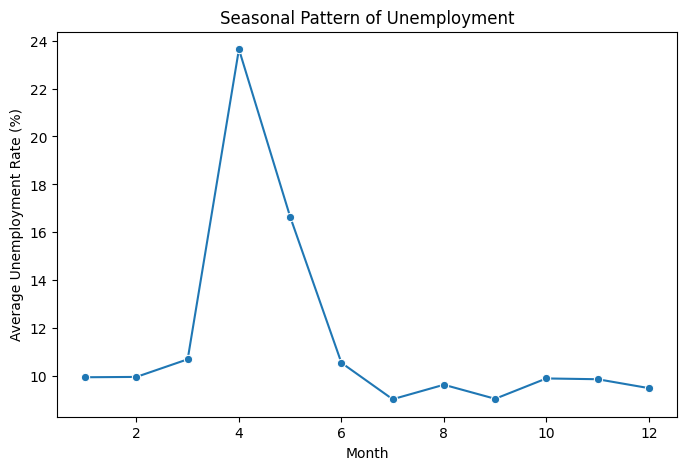

In [22]:
df['month'] = df['date'].dt.month
month_avg = df.groupby('month')[rate_col].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=month_avg.index, y=month_avg.values, marker='o')
plt.title("Seasonal Pattern of Unemployment")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.show()


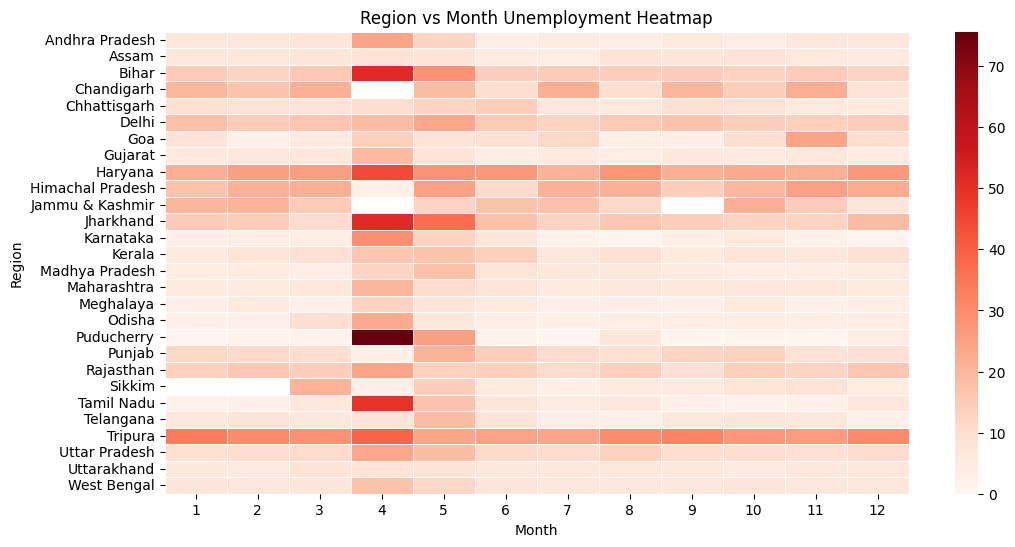

In [23]:
pivot = df.pivot_table(index='region', columns=df['date'].dt.month,
                       values=rate_col, aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Reds", linewidths=0.5)
plt.title("Region vs Month Unemployment Heatmap")
plt.xlabel("Month")
plt.ylabel("Region")
plt.show()
